<a href="https://colab.research.google.com/github/Shridhar2602/RecSys/blob/main/Pre_Mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Imports

In [70]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Read Data and tweaks

In [71]:
DF = pd.read_excel('/content/gdrive/MyDrive/RS/Course Recommendation System(1-128).xlsx')
DF.drop(DF.columns[[0, 1, 2, 3, 4, 5]], axis=1, inplace=True) # Delete unnecessary columns
DF.drop_duplicates(keep=False, inplace=True) # Remove duplicate rows
len(DF)

128

In [72]:
DF.head()

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
DF.dropna(inplace=True)
len(DF)
# DF.head()

52

In [74]:
scaled_df = StandardScaler().fit_transform(DF)

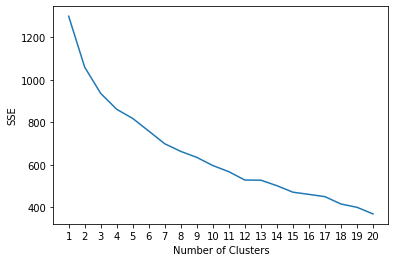

In [75]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

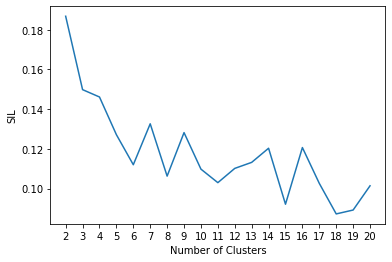

In [76]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(scaled_df)
  labels = kmeans.labels_
  sil.append(silhouette_score(scaled_df, labels, metric = 'euclidean'))

plt.plot(range(2, 21), sil)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SIL")
plt.show()